In [276]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
'''
What if you think about the quality of wine, how can you differentiate the wine according to their quality? 
The big question arises.
According to experts, the wine is differentiated according to its smell, flavor, and color, 
but we are not a wine expert to say that wine is good or bad. What will we do then? Here’s the use of Machine Learning comes, 
yes you are thinking to write we are using machine learning to check wine quality. '''

'\nWhat if you think about the quality of wine, how can you differentiate the wine according to their quality? \nThe big question arises.\nAccording to experts, the wine is differentiated according to its smell, flavor, and color, \nbut we are not a wine expert to say that wine is good or bad. What will we do then? Here’s the use of Machine Learning comes, \nyes you are thinking to write we are using machine learning to check wine quality. '

In [278]:
#Now, we start our journey towards the prediction of wine quality,

In [279]:
df=pd.read_csv('winequality-white.csv')

In [140]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [280]:
print(pd.unique(df['quality']))

[6 5 7 8 4 3 9]


In [281]:
df.shape

(4898, 12)

In [282]:
#checking for null values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [283]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [284]:
#checking and dropping duplicate values
df.duplicated().sum()

937

In [285]:
df.drop_duplicates(inplace=True)

In [286]:
df.duplicated().sum()

0

In [287]:
#after dropping duplicate value shape will be change
df.shape

(3961, 12)

In [288]:
#checking outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers=df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ]
outliers.isna().sum()


fixed_acidity           3855
volatile_acidity        3828
citric_acid             3738
residual_sugar          3945
chlorides               3783
free_sulfur_dioxide     3917
total_sulfur_dioxide    3947
density                 3955
pH                      3915
sulphates               3865
alcohol                 3961
quality                 3805
dtype: int64

In [289]:
#removing outliers
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(3131, 12)

In [290]:
df1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000
mean,6.799872,0.265698,0.324938,5.848659,0.042182,34.290802,136.122804,0.993652,3.195097,0.482935,10.626673,5.860747
std,0.755158,0.078085,0.086868,4.649622,0.009902,15.130946,41.721092,0.002750,0.139474,0.097937,1.172085,0.757347
min,4.800000,0.080000,0.100000,0.600000,0.014000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,105.000000,0.991500,3.100000,0.410000,9.600000,5.000000
50%,6.800000,0.260000,0.310000,4.750000,0.042000,33.000000,131.000000,0.993360,3.190000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,8.700000,0.049000,45.000000,166.000000,0.995600,3.290000,0.540000,11.400000,6.000000
max,8.800000,0.510000,0.570000,19.800000,0.072000,78.000000,256.000000,1.001700,3.590000,0.760000,14.200000,7.000000


In [291]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile_acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric_acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual_sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free_sulfur_dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total_sulfur_dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


## spliting the data into x and y

In [292]:
x=df1.iloc[:,0:11].values


In [293]:
x

array([[ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       [ 7.2 ,  0.23,  0.32, ...,  3.19,  0.4 ,  9.9 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [160]:
y=df1.iloc[:,11].values

In [161]:
y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

## split the data in train and test

In [294]:

from sklearn.model_selection import train_test_splitf

In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [296]:
x_train.shape

(2348, 11)

In [297]:
x_test.shape

(783, 11)

## Scaling of X

In [298]:
#scaling of data
from sklearn.preprocessing import StandardScaler

In [299]:
sc=StandardScaler()

In [300]:
x_train=sc.fit_transform(x_train)

In [169]:
x_test=sc.transform(x_test)
#x_train=sc.transform(x_train)

## importing models

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
from sklearn.svm import SVC

## model selection

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [177]:

models=[]

In [178]:
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))

In [179]:
models.append(('LDA',LinearDiscriminantAnalysis()))

In [180]:
models.append(('KNN',KNeighborsClassifier()))

In [181]:
models.append(('DT',DecisionTreeClassifier()))

In [182]:
models.append(('KNN',KNeighborsClassifier()))

In [183]:
models.append(('NB',GaussianNB()))

In [184]:
models.append(('SVM',SVC(gamma='')))

In [185]:
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma=''))]

In [186]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))



LR: 0.566885
LDA: 0.564754
KNN: 0.527298
DT: 0.477863
KNN: 0.527298
NB: 0.487239
SVM: nan


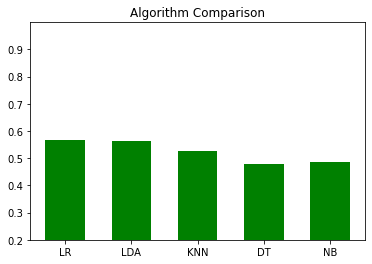

In [187]:
import matplotlib.pyplot as pl
pl.ylim(.200, .999)
pl.bar(names, res, color ='green', width = 0.6)

pl.title('Algorithm Comparison')
pl.show()

## LR is greater than other so we have to choose LR and fitting model

In [188]:

model=LogisticRegression(random_state=0)

In [189]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [190]:
y_pred=model.predict(x_test)

## printing confusion matrix and accuracy model

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[  0  10   5   0]
 [  2 105 117   5]
 [  0  73 279  41]
 [  0   9  91  46]]
Accuracy of the Model: 54.91698595146871%


## PCA

In [210]:
sc=StandardScaler()
sc.fit(x_train) #fitting
sc_data=sc.transform(x_train)

In [211]:
from sklearn.decomposition import PCA

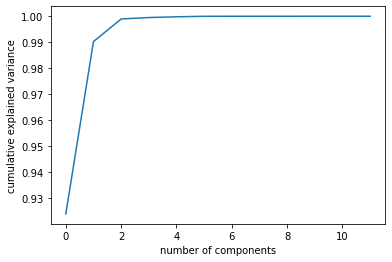

In [263]:
pca = PCA().fit(df1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [264]:
X_pca.shape

(2348, 2)

In [265]:
pca=PCA(n_components=2) #refer above diagram where we can see 2 is closer to 100% data so we are taking components=2
pca.fit(sc_data)
X_pca=pca.transform(sc_data)
X_pca

array([[ 1.62698095,  0.11620438],
       [-0.8426495 , -0.07724779],
       [ 5.19329033,  2.02234354],
       ...,
       [ 2.09018417,  0.51787329],
       [ 0.35442049, -0.12499311],
       [ 1.40120929,  0.43619981]])

In [266]:
X_pca.shape

(2348, 2)

In [267]:
y_train.shape

(2348,)

In [217]:
# putting X_pca inplace of x_train and with y_train to fitting again
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma=''))]

In [218]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_pca, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

LR: 0.494901
LDA: 0.489371
KNN: 0.438682
DT: 0.391806
KNN: 0.438682
NB: 0.494894
SVM: nan


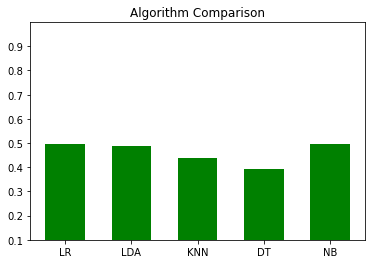

In [233]:
import matplotlib.pyplot as pl
pl.ylim(.100, .999)
pl.bar(names, res, color ='green', width = 0.6)

pl.title('Algorithm Comparison')
pl.show()

In [301]:
import lightgbm as lgb

In [302]:
Model_Parameter={'random_state':0,'learning_rate':0.1,'n_estimator':10}

In [303]:
Model=lgb.LGBMClassifier(**Model_Parameter)

In [304]:
Model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMClassifier(n_estimator=10, random_state=0)

In [305]:
Y_pred=Model.predict(x_test)

In [228]:
Y_pred

array([7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7,
       5, 7, 6, 7, 6, 5, 6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6,
       5, 5, 6, 7, 5, 6, 5, 7, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 5, 5, 6, 6,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7,
       6, 4, 6, 6, 4, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 4, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 5, 6, 7, 7, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 7,
       5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6,

In [307]:
y_test.shape
Y_pred.shape 

(783,)

## For multi class classification problem, our evalutaion metrics will have an additional parameter called micro and macro

In [312]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))


Accuracy: 0.55

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.40
Macro Recall: 0.37
Macro F1-score: 0.38

Weighted Precision: 0.53
Weighted Recall: 0.55
Weighted F1-score: 0.53

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        15
     Class 2       0.53      0.46      0.49       229
     Class 3       0.57      0.71      0.63       393
     Class 4       0.50      0.32      0.39       146

    accuracy                           0.55       783
   macro avg       0.40      0.37      0.38       783
weighted avg       0.53      0.55      0.53       783



In [244]:
from sklearn.metrics import confusion_matrix

In [255]:
Cm=confusion_matrix(y_test,Y_pred)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, Y_pred)*100))
print(Cm)

Accuracy of the Model: 53.76756066411239%
[[  1   9   5   0]
 [  3 115 103   8]
 [  2  86 256  49]
 [  0   9  88  49]]
